# Info 3950 Problem Set 4

**due Tue evening 21 Mar 2023 23:00**

Remember to include your name and netid in the first cell. Submit via [gradescope](https://gradescope.com/).<br>
Remember to save your notebook before uploading, and then after uploading click the code button on gradescope to verify that your notebook renders properly, and is your latest version.


<font size="-1">[Also note that these problem sets are not intended as group projects: the work you submit must be your own. You can discuss with other students at a high level, for example general methods or strategies to solve a problem, but you must cite the other student(s) in your submission. Any work you submit must be your own understanding of the solution, the details of which you personally and individually worked out, and written in your own words. In no cases should notebooks or code be shared.]</font>

In [1]:
# Alex Weseley alw269

## 1) Logistic regression for text classification

### A. Sentiment analysis, Boolean features

i) Return to problem 1 of [ps2](https://nbviewer.jupyter.org/url/courses.cit.cornell.edu/info3950_2023sp/ps2.ipynb),
and use instead logistic regression for the binary features on the same feature set in part A (1000 most common and 1000 most discriminating) -- it will need `max_iter=1000`, and leave the regularization at the default `C=1` (and similarly for the rest of ps4, unless specified otherwise).
Use `cross_val_score()` to see whether the mean score for 10-fold cross validation improves over the Bernoulli naive Bayes in ps2#1A.

This should be very simple, since the feature sets are the same as before, it's just a question of swapping in [sklearn.linear_model.LogisticRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) instead of 
[sklearn.naive_bayes.BernoulliNB()](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) (and you have access to ps2 solutions). 

ii) In lec 12 (Tue 7 Mar), we discussed the role of "regularization" and how it works. In the case of most common features above, you should find that with the default regularization `C=1` there's a very slight improvement in average test score over `BernoulliNB()`, but the training score is 100%, the usual signal of overfitting. Increase the regularization, by decreasing `C`, to see if you can bring the average test score up by a few percent (into the low 80s).

In [2]:
# Code taken from my ps2 

#Note: review_polarity.tar.gz unpacks the files
#into txt_sentoken/neg and txt_sentoken/pos directories
#they can be read into lists as below

from glob import glob #gets list of files from directory
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt, numpy as np
%matplotlib inline
import re
from collections import Counter, defaultdict
from sklearn.model_selection import cross_val_score, cross_validate

negfiles = sorted(glob('txt_sentoken/neg/*.txt'))
posfiles = sorted(glob('txt_sentoken/pos/*.txt'))

negtexts = [open(f).read() for f in negfiles]
postexts = [open(f).read() for f in posfiles]

alltexts = negtexts + postexts

len(negtexts), len(postexts)

#have a look at a few of these, they're already lowercased ...
# print (postexts[44])

# print (negtexts[928])

allvocab = Counter()
pvocab =  Counter()
nvocab = Counter()

def words(txt): # lecture notebook 6.1
    return re.findall(r"['\w]+", txt.lower())

def features(txt,Nf):
    f = np.zeros(Nf)
    for w in set(words(txt)) & set_vocab: f[word_index[w]] = 1
    return f  #array of zeros and ones for whether or not feature words occur

In [3]:
# Code below taken from solution set
nvocab = Counter()
for txt in negtexts:
    for w in set(words(txt)): nvocab[w] += 1
        
pvocab = Counter()
for txt in postexts:
    for w in set(words(txt)): pvocab[w] += 1

allwords = pvocab + nvocab

In [4]:
# A i (most discriminating)

disc10 = {w: (nvocab[w]+.5)/(pvocab[w]+.5) for w in allwords if allwords[w]>=10}

Nf=1000
vocab = sorted (disc10, key=disc10.get, reverse=True)[:Nf//2] +\
         sorted (disc10, key=disc10.get)[:Nf//2]
word_index = {w:k for k,w in enumerate(vocab)} #assigns word each an index by rank
set_vocab = set(vocab)

X_data = [features(txt,Nf) for txt in negtexts+postexts]
y_data = [0]*1000 + [1]*1000

clf = LogisticRegression(max_iter = 1000, multi_class="ovr")
clf.fit(X_data, y_data)

scores = cross_val_score(clf, X_data, y_data, cv=10)
print("Mean score:", round(scores.mean()*100,2), "%") #I dont know how to get the mean above 90

Mean score: 89.25 %


The mean score went down from the BernoulliNB mean score shown in the solutions, 90.9%, to 89.25% with the logistic regression

---

In [5]:
Nf=1000
vocab = sorted (allwords, key=allwords.get, reverse=True)[:Nf]  #Nf most common
word_index = {w:k for k,w in enumerate(vocab)} #assigns word each an index by rank
set_vocab = set(vocab)

In [6]:
#http://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html
#http://scikit-learn.org/stable/modules/cross_validation.html   
#10 fold cross validation
X_data = [features(txt,Nf) for txt in negtexts+postexts]
y_data = [0]*1000 + [1]*1000

In [7]:
clf = LogisticRegression(max_iter = 1000, multi_class = "ovr")
clf.fit(X_data, y_data)
scores = cross_val_score(clf, X_data, y_data, cv=10) # or try cv = 20 for 95%/5% splits
print(round(scores.mean()*100,2), "%")

79.4 %


The mean score improves by .1% from the BernoulliNB

---

In [8]:
# 1 A ii
clf = LogisticRegression(max_iter = 1000, C = .0063)
clf.fit(X_data, y_data)
scores = cross_val_score(clf, X_data, y_data, cv=10)
print(round(scores.mean()*100,3), "%")

82.35 %


I was able to increase the average test score to 82.35 by setting the regularization of the logistic regression to C = .0063

### B. 12-class abstracts, Boolean and numerical features

Note: I'm calling the features 'numerical' (as opposed to boolean (0,1)), rather than 'multinomial', to distinguish that from the entirely different notion of 'multinomial' used 

i) Problem 2 of [ps2](https://nbviewer.jupyter.org/url/courses.cit.cornell.edu/info3950_2023sp/ps2.ipynb)
used `BernoulliNB()` and `MultinomialNB()` to classify the twelve sets of abstracts in `ps1data`. Try using `LogisticRegression()` on both the binary and 'multinomial' features for this 12-class data, and see whether the mean 10-fold cross validation improves. (This is again just an exercise in swapping in a different classifier function, and you can try both `multi_class='ovr'` or the default `multi_class='multinomial'` for this.)

ii) In Lecture 12, there was a blackboard sketch of the effect of changing regularization `C` on the training and test scores for this problem, to suggest how an optimal value of `C` can be chosen. (The sketch was along the lines of the below, but note that the numbers below are not supposed to be accurate.)  Reproduce the graph for this problem, comparing average test and training scores for 10-fold validation for boolean and numerical features over a range of `C` (the plot below uses `np.logspace(-4,1,16)`, and you can use the default `multi_class='multinomial'` for this, or again try both) 

In [9]:
def nfeatures(txt,Nf):
    f = np.zeros(Nf)
    count = Counter(words(txt))
    for w in set(count) & set_vocab: f[word_index[w]] = count[w]
    return f

In [10]:
# B i 

from ps1data import absdata
classnames = sorted(absdata)

vocab = {subj: Counter() for subj in classnames}
for subj in classnames:
  for txt in absdata[subj]:
     for w in set(words(txt)): vocab[subj][w] += 1
    
total_vocab = Counter()
for subj in classnames: total_vocab += vocab[subj]


Nf = 2500
Nfvocab, Nfn = zip(*total_vocab.most_common(Nf+36)[36:])
word_index = {w:k for k,w in enumerate(Nfvocab)} #assigns each word an index by rank
set_vocab = set(Nfvocab)
oX_data = np.array([features(txt, Nf) for subj in classnames for txt in absdata[subj]]) #all data
mX_data = np.array([nfeatures(txt, Nf) for subj in classnames for txt in absdata[subj]]) #all data
y_data = np.array([[i]*1000 for i in range(12)]).flatten()

In [11]:
clf = LogisticRegression(multi_class="ovr", max_iter = 1000)

In [12]:
%%time 
scores = cross_val_score(clf, oX_data, y_data, cv=10)

CPU times: user 9min 43s, sys: 9 s, total: 9min 52s
Wall time: 1min 35s


In [13]:
print ('mean = {:.1%}'.format(round(scores.mean(),3)))
scores

mean = 84.1%


array([0.84      , 0.8475    , 0.84333333, 0.8525    , 0.84      ,
       0.85083333, 0.84416667, 0.83916667, 0.8225    , 0.83083333])

---

In [14]:
clf = LogisticRegression(multi_class="multinomial", max_iter = 1000)

In [15]:
%%time 
scores = cross_val_score(clf, mX_data, y_data, cv=10)

CPU times: user 7min 51s, sys: 9.59 s, total: 8min 1s
Wall time: 1min 7s


In [16]:
print ('mean = {:.1%}'.format(round(scores.mean(),3)))
scores

mean = 84.1%


array([0.845     , 0.84666667, 0.83916667, 0.83916667, 0.84833333,
       0.85083333, 0.845     , 0.83166667, 0.82916667, 0.83583333])

---

In [17]:
%%time

# 1Bii)

ovr_score_list = []
multi_score_list = []
c_space = np.logspace(-4,1,16)

for c in c_space:
    clf_ovr = LogisticRegression(multi_class='ovr', C=c, max_iter=1000)
    clf_multi = LogisticRegression(multi_class='multinomial', C=c, max_iter=1000)

    ovr_score_list.append(cross_validate(clf_ovr, oX_data, y_data, cv=10, return_train_score=True))
    multi_score_list.append(cross_validate(clf_multi, mX_data, y_data, cv=10, return_train_score=True))
    

CPU times: user 2h 31min 33s, sys: 2min 27s, total: 2h 34min
Wall time: 20min 1s


In [18]:
ovr_train_scores_means = [item['train_score'].mean() for item in ovr_score_list]
ovr_test_scores_means = [item['test_score'].mean() for item in ovr_score_list]

multi_train_scores_means = [item['train_score'].mean() for item in multi_score_list]
multi_test_scores_means = [item['test_score'].mean() for item in multi_score_list]

In [19]:
ovr_train_scores_means

[0.8120555555555556,
 0.8203888888888888,
 0.8329074074074075,
 0.8473611111111111,
 0.860648148148148,
 0.8767962962962963,
 0.8962407407407407,
 0.9195648148148148,
 0.9432592592592591,
 0.9663333333333334,
 0.9860925925925924,
 0.9969074074074074,
 0.9998148148148148,
 1.0,
 1.0,
 1.0]

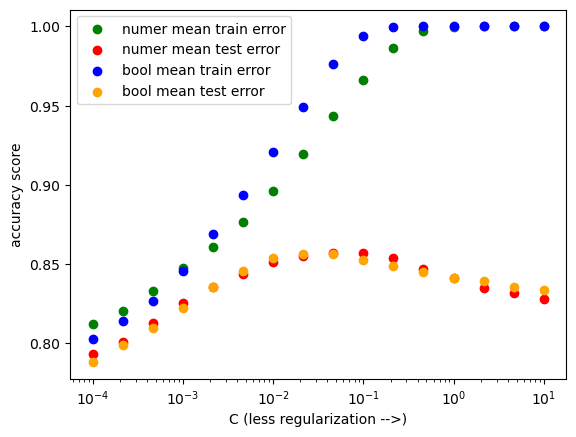

In [20]:
plt.scatter(c_space, ovr_train_scores_means, color="green", label = "numer mean train error")
plt.scatter(c_space, ovr_test_scores_means, color="red", label = "numer mean test error")
plt.scatter(c_space, multi_train_scores_means, color="blue", label = "bool mean train error")
plt.scatter(c_space, multi_test_scores_means, color="orange", label = "bool mean test error")
plt.legend()
plt.xlabel("C (less regularization -->)")
plt.ylabel('accuracy score')
plt.xscale('log')

In [21]:
# from IPython.display import Image
# Image('Creg.png', width=400)

## 2) Multinomial regression and adversarial digit recognition (Cont'd)

This is a continuation of problem 2 from [ps3](https://nbviewer.org/url/courses.cit.cornell.edu/info3950_2023sp/ps3.ipynb), based on [lec10_digits.ipynb](https://nbviewer.org/url/courses.cit.cornell.edu/info3950_2023sp/lec10_digits.ipynb) and using the same `digits` data. (mention of parts **B,C** below refer to that problem)

The object of this part is to train a 'multinomial' version of the logistic classifier (rather than the default 'ovr' = "one versus rest").

**D.** Now train a classifier using the 'multinomial' option, 

    logreg_multi = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg')
    
use it to fit the same training data as above, and score on the same test data. You should find again 169/180, but check whether it misses a different set of 11 images. (In fact, although it misses overall the same number, the ones that it misses are slightly different.)  In particular see whether it misses the three `test3 = [X_test[i].copy() for i in (11, 43, 113)]` in part **B**, and see whether the single pixel manipulations used in parts **B.i,ii,iii** correctly alter the result of this classifier as well.

In [22]:
import numpy as np, matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets, linear_model
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

def unrav(k): return (k%8-.5, k//8-.5)

In [23]:
n_samples = len(X_digits)
n_training=int(.9*n_samples)
X_train = X_digits[:n_training] #first 90%
y_train = y_digits[:n_training]
X_test = X_digits[n_training:]  #last 10%
y_test = y_digits[n_training:]

logreg_multi = LogisticRegression(multi_class='multinomial', solver = 'newton-cg', max_iter=1000).fit(X_train, y_train)

In [24]:
print('LogisticRegression score (ovr): {:.6f}'.format(logreg_multi.score(X_test, y_test)))
print ('169/180 = {:.6f}, so 11 wrong'.format(169/180))

LogisticRegression score (ovr): 0.938889
169/180 = 0.938889, so 11 wrong


In [25]:
y_pred = logreg_multi.predict(X_test)
diffs = y_pred != y_test

print ('    indices:', np.where(diffs)[0])
print ('predictions:', y_pred[diffs])
print ('    actuals:', y_test[diffs])

    indices: [ 11  41  43  63  73 106 109 110 112 113 148]
predictions: [9 8 9 8 8 4 8 8 5 8 5]
    actuals: [4 9 4 3 3 1 3 3 3 3 3]


In [26]:
test3 = [X_test[i].copy() for i in (11, 43, 113)]

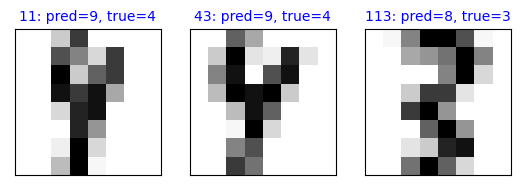

In [27]:
fig,axi = plt.subplots(1,3)
for i,ax in zip((11, 43, 113),axi):
    test = np.copy(X_test[i])
    ax.imshow(test.reshape(8,8), cmap='Greys', aspect=1, interpolation='none')
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_title(f'{i}: pred={y_pred[i]}, true={y_test[i]}',fontsize=10,color='b')

x_test[11] was predicted 9, set test[41]=10, now (correctly) 4
x_test[43] was predicted 9, set test[41]=10, now (correctly) 9


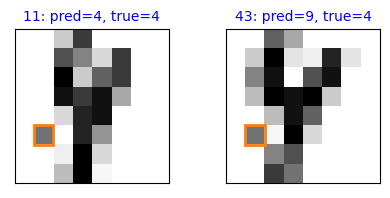

In [28]:
fig,ax = plt.subplots(1,2, figsize=(5,2))
for i,axi in zip((11,43),ax):
    test = np.copy(X_test[i])
    test[41] = 10
    print(f'x_test[{i}] was predicted {y_pred[i]}, set test[41]=10, now (correctly) {logreg_multi.predict([test,])[0]}')
    axi.imshow(test.reshape(8,8), cmap='Greys', aspect=1, interpolation='none')
    axi.add_patch(plt.Rectangle(unrav(41),1,1,color='none', ec='C1', linewidth=2))
    axi.set_xticks([]), axi.set_yticks([])
    axi.set_title(f'{i}: pred={logreg_multi.predict([test,])[0]}, true={y_test[i]}',fontsize=10,color='b')

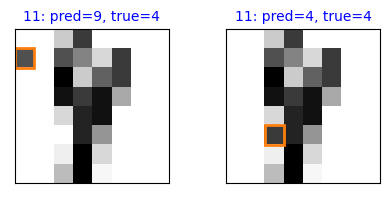

In [29]:
# either test[8] = 12 or test[42] = 13 will work
i = 11
fig,ax = plt.subplots(1,2, figsize=(5,2))
for (k,j),axi in zip(((8,12),(42,13)),ax):
    test = np.copy(X_test[i])
    test[k] = j
    axi.imshow(test.reshape(8,8), cmap='Greys', aspect=1, interpolation='none')
    axi.set_xticks([]), axi.set_yticks([])
    axi.add_patch(plt.Rectangle(unrav(k),1,1,color='none', ec='C1', linewidth=2))
    axi.set_title(f'{i}: pred={logreg_multi.predict([test,])[0]}, true={y_test[i]}',fontsize=10,color='b')

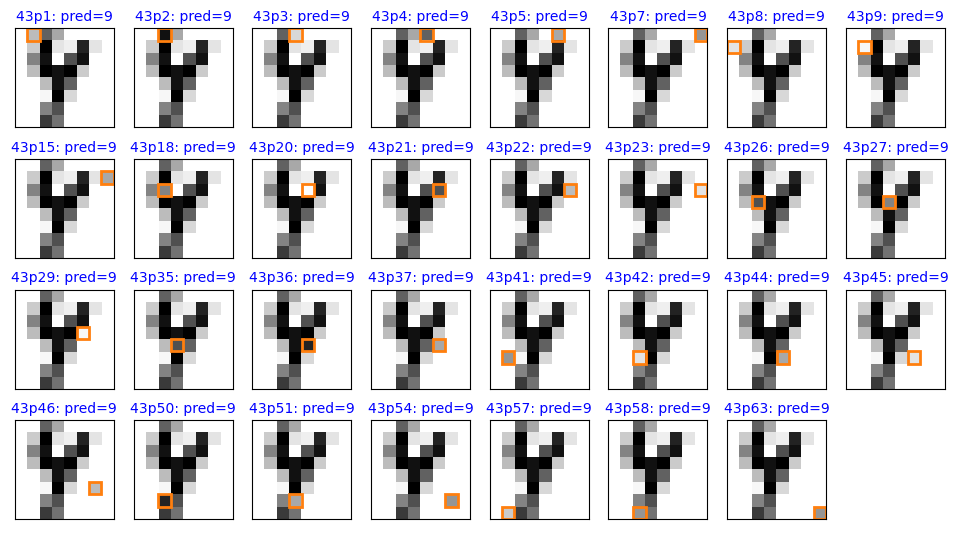

In [30]:
c43t8 = [(1, 6), (2, 15), (3, 4), (4, 11), (5, 7), (7, 8), (8, 3), (9, 1), (15, 7), (18, 9), (20, 0),
         (21, 12), (22, 6), (23, 3), (26, 12), (27, 9), (29, 1), (35, 12), (36, 14), (37, 7), (41, 8),
         (42, 3), (44, 7), (45, 3), (46, 6), (50, 14), (51, 7), (54, 8), (57, 5), (58, 8), (63, 8)]
i = 43
fig,ax = plt.subplots(4,8, figsize=(12,6.5))
for (k,j),axi in zip(c43t8,ax.flatten()):
    test = np.copy(X_test[i])
    test[k] = j
    axi.imshow(test.reshape(8,8), cmap='Greys', aspect=1, interpolation='none')
    axi.add_patch(plt.Rectangle(unrav(k), 1,1, color='none', ec='C1', linewidth=2))
    axi.set_xticks([]), axi.set_yticks([])
    axi.set_title(f'{i}p{k}: pred={logreg_multi.predict([test,])[0]}',fontsize=10,color='b')
ax[-1,-1].axis(False);

x_test[113] was predicted 8, set test[58]=16, now (correctly) 3
x_test[113] was predicted 8, set test[43]=5, now (correctly) 3
x_test[113] was predicted 8, set test[38]=15, now (correctly) 3
x_test[113] was predicted 8, set test[2]=2, now (correctly) 8
x_test[113] was predicted 8, set test[6]=13, now (correctly) 8
x_test[113] was predicted 8, set test[46]=14, now (correctly) 8


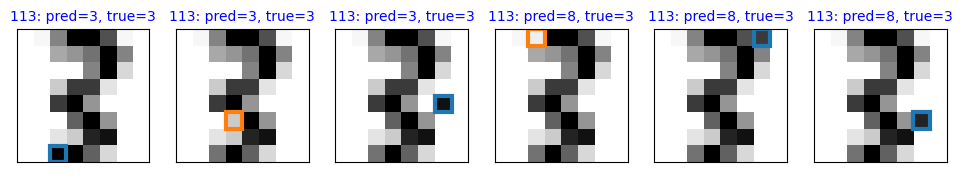

In [31]:
i=113
fig,ax = plt.subplots(1,6, figsize=(12,2))
for (k,j),axi in zip(((58,16), (43,5), (38,15), (2,2), (6,13), (46,14)), ax):
    test = np.copy(X_test[i])
    test[k] = j
    print(f'x_test[{i}] was predicted {y_pred[i]}, set test[{k}]={j}, now (correctly) {logreg_multi.predict([test,])[0]}')
    axi.imshow(test.reshape(8,8), cmap='Greys', aspect=1, interpolation='none')
    axi.add_patch(plt.Rectangle(unrav(k),1,1,color='none', ec='C0' if j > 8 else 'C1', linewidth=3))
    axi.set_xticks([]), axi.set_yticks([])
    axi.set_title(f'{i}: pred={logreg_multi.predict([test,])[0]}, true={y_test[i]}',fontsize=10,color='b')

**The pixel manipulations done in problem set 3 part 2B do not alter the predicted result of this classifier correctly.**

**E.** Now see how the `logreg_multi.predict_proba()` probabilities are calculated. Using the `.coef_` and `.intercept_` attributes, calculate the $x_i = \vec w_i \cdot \vec f + \vec b_i$, as in part **C** for $\vec f$ features given by `X_test[43]`. Now calculate the probabilities using the multinomial logistic formula $p(i) = \exp(x_i) / \sum_{i=0}^9 \exp(x_i)$.
These should agree with the values given by `logreg_multi.predict_proba([X_test[43]])`.

In [32]:
x = logreg_multi.coef_ @ X_test[43] + logreg_multi.intercept_
q = np.exp(x)
q / q.sum() 

array([2.74016170e-11, 1.08314352e-08, 1.15644369e-08, 3.20970246e-11,
       5.28387523e-03, 1.49265721e-08, 1.60429651e-09, 2.72983581e-06,
       4.83964142e-02, 9.46316942e-01])

In [33]:
logreg_multi.predict_proba([X_test[43]])

array([[2.74016170e-11, 1.08314352e-08, 1.15644369e-08, 3.20970246e-11,
        5.28387523e-03, 1.49265721e-08, 1.60429651e-09, 2.72983581e-06,
        4.83964142e-02, 9.46316942e-01]])

**F.** So far, this problem has only considered a single train/test data split. Produce another plot along the lines of 1B above to see whether either `multi_class='ovr'` or the default `multi_class='multinomial'` can improve the 10-fold cross-validated average test score for some value of regularization `C`.

In [34]:
%%time
# F

ovr_score_list = []
multi_score_list = []
c_space = np.logspace(-4,1,16)

for c in c_space:
    clf_ovr = LogisticRegression(multi_class='ovr', C=c, max_iter=1000)
    clf_multi = LogisticRegression(multi_class='multinomial', C=c, max_iter=1000)

    ovr_score_list.append(cross_validate(clf_ovr, oX_data, y_data, cv=10, return_train_score=True))
    multi_score_list.append(cross_validate(clf_multi, mX_data, y_data, cv=10, return_train_score=True))

CPU times: user 2h 15min 21s, sys: 2min 6s, total: 2h 17min 27s
Wall time: 14min 55s


In [35]:
m_scores = cross_val_score(clf, X_test, y_test, cv=10)
print ('mean = {:.1%}'.format(round(m_scores.mean(),3)))

/Users/alexweseley/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexweseley/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

mean = 96.1%


In [36]:
clf = LogisticRegression(multi_class='ovr', solver = 'newton-cg', C = .1)
clf.fit(X_train, y_train)

LogisticRegression(C=0.1, multi_class='ovr', solver='newton-cg')

In [37]:
ovr_scores = cross_val_score(clf, X_test, y_test, cv=10)
print ('mean = {:.1%}'.format(round(ovr_scores.mean(),3)))

mean = 96.7%


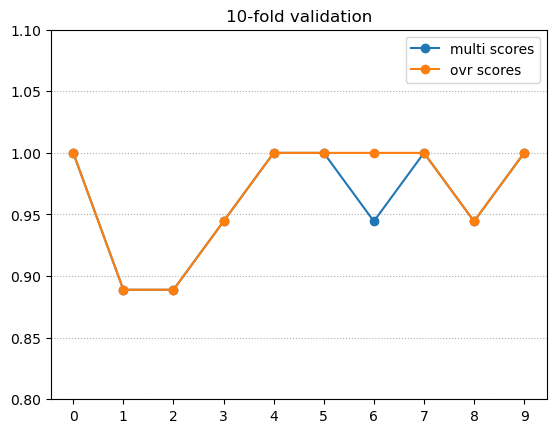

In [38]:
plt.plot(range(10),m_scores, 'o-', label='multi scores')
plt.plot(range(10),ovr_scores, 'o-', label='ovr scores')

# plt.plot(range(10),scores['test_score'], 'o-', label='test scores')
plt.title('10-fold validation')
plt.xticks(range(10))
plt.grid(axis='y', linestyle='dotted')
plt.ylim(.8,1.1)
plt.legend();

## 3) knn digit data

In the [digits_classification_exercise](http://scikit-learn.org/stable/auto_examples/exercises/plot_digits_classification_exercise.html) discussed in class (see [lec9_digits.ipynb](https://nbviewer.org/url/courses.cit.cornell.edu/info3950_2023sp/lec10_digits.ipynb)), [logistic regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) was used to classify 8x8 images of handwritten digits. This is the same dataset as used in [ps3](https://nbviewer.jupyter.org/url/courses.cit.cornell.edu/info3950_2023sp/ps3.ipynb) problem 2.

**A.** k=1

Train a [KNeighborsClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) with k=1 on the same training set, and determine its accuracy on the test set.

(You should find that it does better than the 169/180 score of the logistic classifier.)

Visualize the ones it gets wrong together with the single nearest neighbor (as given by `.kneighbors()`) that caused it to be misclassified.<br>
(This is perhaps easiest in a grid with two rows, showing the ones misclassified in the first row, with their test indices above, and the nearest neighbors directly below, with their training indices; and with the correct labels in the upper right of all. It might look something like the below [if there were 5 wrong], though the first row is not actually the ones that were wrong and the 2nd row is not actually their nearest neighbors.)

In [39]:
import numpy as np, matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier

from sklearn import datasets, linear_model
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

def unrav(k): return (k%8-.5, k//8-.5) #or use np.unravel_index() to translate 
n_samples = len(X_digits)
n_training=int(.9*n_samples)
X_train = X_digits[:n_training] #first 90%
y_train = y_digits[:n_training]
X_test = X_digits[n_training:]  #last 10%
y_test = y_digits[n_training:]

knn1 = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
print('KNN score: {:.6f}'.format(knn1.score(X_test, y_test)))

KNN score: 0.966667


In [40]:
print(knn1.kneighbors([X_test[j] for j in np.where(diffs)[0]], return_distance = False))

[[1611]
 [1346]
 [1611]
 [1602]
 [  74]
 [ 298]
 [ 749]
 [ 114]
 [ 269]
 [1606]
 [  74]]


In [41]:
y_pred = knn1.predict(X_test)
diffs = y_pred != y_test
indices = np.where(diffs)[0]

print ('    indices:', indices)
print ('predictions:', y_pred[diffs])
print ('    actuals:', y_test[diffs])

    indices: [ 15  41  73 110 148 173]
predictions: [9 3 5 8 5 1]
    actuals: [3 9 3 3 3 8]


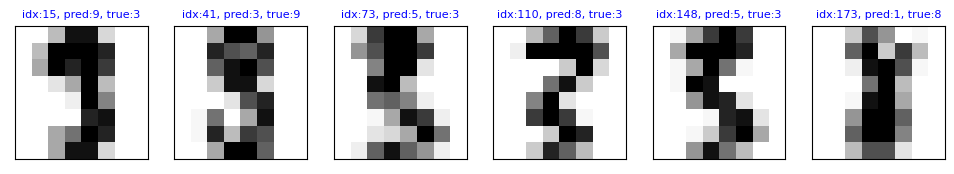

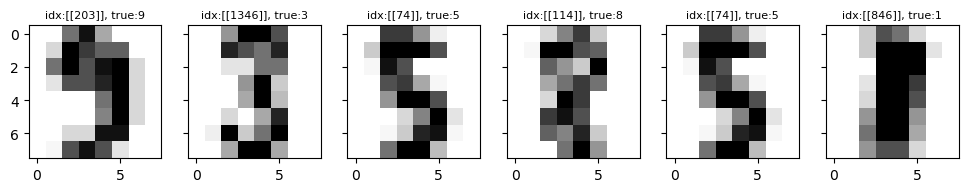

In [42]:
fig,axi = plt.subplots(1,6,figsize=(12, 4), sharex=True, sharey=True)
for i,ax in zip(np.where(diffs)[0],axi.flatten()):
    ax.imshow(X_test[i].reshape(8,8),cmap='Greys', aspect=1, interpolation='none')
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_title(f'idx:{i}, pred:{y_pred[i]}, true:{y_test[i]}',fontsize=8,color='b')
    
fig,axi = plt.subplots(1,6,figsize=(12, 4), sharex=True, sharey=True)
for j,ax in zip(np.where(diffs)[0],axi.flatten()):
    indices = knn1.kneighbors(X_test[j].reshape(1, -1), return_distance = False)
    # print(indices)
    ax.imshow(X_train[indices].reshape(8,8),cmap='Greys', aspect=1, interpolation='none')
    ax.set_title(f'idx:{indices}, true:{y_pred[j]}',fontsize=8)

In [43]:
# Image('4.1A.png')

**B.** k=3,5

With same training and test set as above,

i) Train a `KNeighborsClassifier()` with k=3. How many does it get wrong on the training and test sets?

ii) Train a `KNeighborsClassifier()` with k=5. How many does it get wrong on the training and test sets?

iii) For any that are correct in the test set for k=3, but wrong for k=5. Show the image itself with its five nearest neighbors (as given by `.kneighbors()` from the classifier in part ii) to the right (showing their actual labels in the upper right of each). 

iv) For any that are correct in the test set for k=5, but wrong for k=3. Show the image itself with its five nearest neighbors (as given by `.kneighbors()` from the classifier in part ii) to the right (showing their actual labels in the upper right of each).

In [44]:
print(len(X_train))

1617


In [45]:
# B i)
knn3 = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
print('KNN test score (k=3): {:.6f}'.format(knn3.score(X_test, y_test)))
print('KNN test n incorrect (k=3): {}'.format(180-(180*knn3.score(X_test, y_test))))
print('KNN train score (k=3): {:.6f}'.format(knn3.score(X_train, y_train)))
print('KNN train n incorrect (k=3): {}'.format(1617-(1617*knn3.score(X_train, y_train))))

KNN test score (k=3): 0.966667
KNN test n incorrect (k=3): 6.0
KNN train score (k=3): 0.993197
KNN train n incorrect (k=3): 11.0


In [46]:
# B ii)

knn5 = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
print('KNN test score (k=5): {:.6f}'.format(knn5.score(X_test, y_test)))
print('KNN test n incorrect (k=5): {}'.format(180-(180*knn5.score(X_test, y_test))))
print('KNN train score (k=5): {:.6f}'.format(knn5.score(X_train, y_train)))
print('KNN train n incorrect (k=5): {}'.format(1617-(1617*knn5.score(X_train, y_train))))

KNN test score (k=5): 0.961111
KNN test n incorrect (k=5): 7.0
KNN train score (k=5): 0.990105
KNN train n incorrect (k=5): 16.0


In [47]:
# B iii

y_pred3 = knn3.predict(X_test)
diffs3 = y_pred3 != y_test

In [48]:
indices3_wrong = np.where(diffs3)[0]
indices3_wrong

array([ 11,  41,  45, 110, 148, 173])

In [49]:
y_pred5 = knn5.predict(X_test)
diffs5 = y_pred5 != y_test

In [50]:
indices5_wrong = np.where(diffs5)[0]
indices5_wrong

array([ 41,  43,  45,  49, 110, 148, 173])

In [51]:
indices = list(set(indices5_wrong) - set(indices3_wrong))
indices

[49, 43]

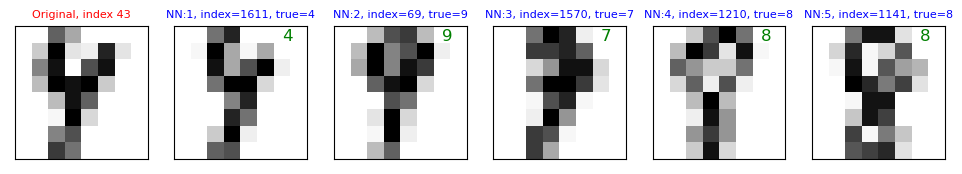

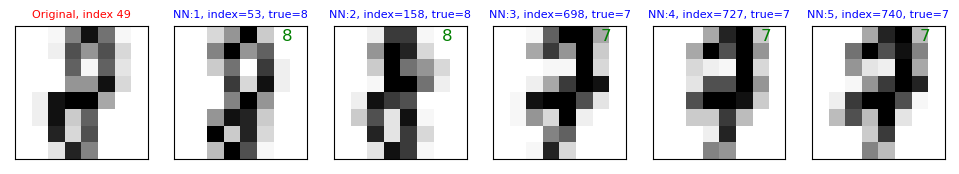

In [52]:
nn_43 = knn5.kneighbors(X_test,5)[1][43]
fig,axi = plt.subplots(1,6,figsize=(12, 4))
og_ax = axi[0]
og_ax.imshow(X_test[43].reshape(8,8), cmap="Greys", aspect = 1, interpolation = "none")
og_ax.set_title("Original, index 43",fontsize=8,color='r')
og_ax.set_xticks([]), og_ax.set_yticks([])
for i,ax in zip(range(len(nn_43)),axi.flatten()[1:]):
    ax.imshow(X_train[nn_43[i]].reshape(8,8),cmap='Greys', aspect=1, interpolation='none')
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_title(f'NN:{i+1}, index={nn_43[i]}, true={y_train[nn_43[i]]}',fontsize=8,color='b')
    ax.text(6, .4, f"{y_train[nn_43[i]]}", color = "g", fontsize=12)
    
nn_49 = knn5.kneighbors(X_test,5)[1][49]
fig,axi = plt.subplots(1,6,figsize=(12, 4))
og_ax = axi[0]
og_ax.imshow(X_test[49].reshape(8,8), cmap="Greys", aspect = 1, interpolation = "none")
og_ax.set_title("Original, index 49",fontsize=8,color='r')
og_ax.set_xticks([]), og_ax.set_yticks([])
for i,ax in zip(range(len(nn_49)),axi.flatten()[1:]):
    ax.imshow(X_train[nn_49[i]].reshape(8,8),cmap='Greys', aspect=1, interpolation='none')
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_title(f'NN:{i+1}, index={nn_49[i]}, true={y_train[nn_49[i]]}',fontsize=8,color='blue')
    ax.text(6, .4, f"{y_train[nn_49[i]]}", color = "g", fontsize=12)
    

In [53]:
# B iv

y_pred5 = knn5.predict(X_test)
diffs5 = y_pred5 != y_test

In [54]:
indices5_wrong = np.where(diffs5)[0]
indices5_wrong

array([ 41,  43,  45,  49, 110, 148, 173])

In [55]:
y_pred3 = knn3.predict(X_test)
diffs3 = y_pred3 != y_test

In [56]:
indices3_wrong = np.where(diffs3)[0]
indices3_wrong

array([ 11,  41,  45, 110, 148, 173])

In [57]:
indices = list(set(indices3_wrong) - set(indices5_wrong))
indices

[11]

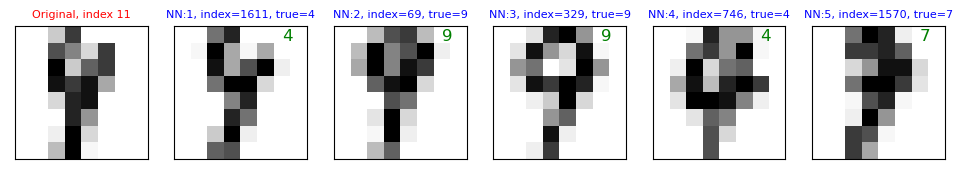

In [58]:
nn_11 = knn3.kneighbors(X_test,5)[1][11]
fig,axi = plt.subplots(1,6,figsize=(12, 4))
og_ax = axi[0]
og_ax.imshow(X_test[11].reshape(8,8), cmap="Greys", aspect = 1, interpolation = "none")
og_ax.set_title("Original, index 11",fontsize=8,color='r')
og_ax.set_xticks([]), og_ax.set_yticks([])

for i,ax in zip(range(len(nn_11)),axi.flatten()[1:]):
    ax.imshow(X_train[nn_11[i]].reshape(8,8),cmap='Greys', aspect=1, interpolation='none')
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_title(f'NN:{i+1}, index={nn_11[i]}, true={y_train[nn_11[i]]}',fontsize=8,color='b')
    ax.text(6, .4, f"{y_train[nn_11[i]]}", color = "g", fontsize=12)

**C.** k=5,15

Repeat part **B** iii,iv for the comparison of k=5 and k=15.

For part iv, show the 15 nearest neighbors, and indicate what the prediction would be for values of k from 1 to 15.<br>
(Note that `KNeighborsClassifier()` appears to break ties by using the smaller numerical label, so if the highest occurring nearest neighbors are equal numbers of 3 and 5 it will classify as 3.)

In [59]:
knn15 = KNeighborsClassifier(n_neighbors=15).fit(X_train, y_train)

In [60]:
# C

y_pred15 = knn15.predict(X_test)
diffs15 = y_pred15 != y_test

In [61]:
indices15_wrong = np.where(diffs15)[0]
indices3_wrong

array([ 11,  41,  45, 110, 148, 173])

In [62]:
y_pred5 = knn5.predict(X_test)
diffs5 = y_pred5 != y_test

In [63]:
indices5_wrong = np.where(diffs5)[0]
indices5_wrong

array([ 41,  43,  45,  49, 110, 148, 173])

In [64]:
indices = list(set(indices15_wrong) - set(indices5_wrong))
indices

[11]

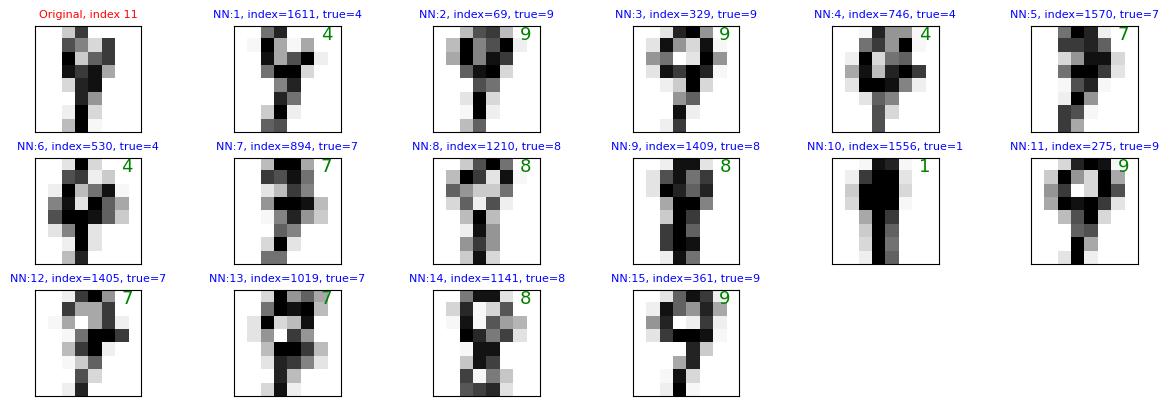

In [65]:
nn_11 = knn15.kneighbors(X_test,15)[1][11]
fig,axi = plt.subplots(3,6,figsize=(12, 4))
og_ax = axi[0][0]
og_ax.imshow(X_test[11].reshape(8,8), cmap="Greys", aspect = 1, interpolation = "none")
og_ax.set_title("Original, index 11",fontsize=8,color='r')
og_ax.set_xticks([]), og_ax.set_yticks([])
for i,ax in zip(range(len(nn_11)),axi.flatten()[1:]):
    ax.imshow(X_train[nn_11[i]].reshape(8,8),cmap='Greys', aspect=1, interpolation='none')
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_title(f'NN:{i+1}, index={nn_11[i]}, true={y_train[nn_11[i]]}',fontsize=8,color='b')
    ax.text(6, .5, f"{y_train[nn_11[i]]}", color = "g", fontsize=13)
axi[2][4].remove()
axi[2][5].remove()

plt.tight_layout(pad=0.3)

**D.** test3

Consider the `test3` images (labels 11, 43, 113) from problem 2.B of [ps3](https://nbviewer.jupyter.org/url/courses.cit.cornell.edu/info3950_2023sp/ps3.ipynb).

i) How many of those does the k=3 classifier get right?

ii) Show each of the three alongside its three nearest neighbors (in a 3 row x 4 column grid, including their indices and correct labels as in above plots, as suggested below). 

iii) What are the probabilistic predictions for these three (from `.predict_proba()`)?

In [66]:
# i
test3 = [X_test[i].copy() for i in (11, 43, 113)]
y_pred_d = knn3.predict(test3)
diffs_d = y_pred_d != y_test[[11,43,113]]

In [67]:
diffs_d

array([ True, False, False])

The k=3 classifier gets 2 of the 3 correct

In [68]:
# ii


In [69]:
# Image('knn3.png')

## 4) kmeans face data

In [lec13_knn-interactive.ipynb](https://nbviewer.jupyter.org/url/courses.cit.cornell.edu/info3950_2023sp/lec13_knn-interactive.ipynb), one of the interactive demos used this data:
[faces.npy](https://courses.cit.cornell.edu/info3950_2023sp/faces.npy), a set of 400 38x31 face images (280 train, 120 test) loadable as

    X_train, y_train, X_test, y_test, xdim, ydim = np.load('faces.npy', allow_pickle=True)

More details about this data are given in the notebook.

In this problem we'll suppose that we were given these images without labels, knowing only that there were 40 distinct subjects, but not knowing how many or which images correspond to each. Following [Example 1](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html#Example-1:-k-means-on-digits) from VanderPlas [05.11-k-means](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html), we can use kmeans on the training set to find natural clusters. For this problem you should initialize as

    KMeans(n_clusters=40, random_state=832)
    
(Since [Kmeans()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) has a random initialization to find the clusters, `random_state=832` will ensure everyone has similar results.)

Lec13 covered enough to make this problem feasible, along with VanderPlas [05.11-k-means](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html), and there will be additional discussion during lec14 on Tues 14 Mar.

In [70]:
X_train, y_train, X_test, y_test, xdim, ydim = np.load('faces.npy', allow_pickle=True)

### A. Cluster centers

Fit your `KMeans()` on the 280 training set examples. It has methods `.cluster_centers_` and `labels_` that will provide the 40 cluster centers it finds, and the cluster label it assigns to the 280 training samples.

Render all 40 cluster centers in a 5 row, 8 column grid (use `figsize=(20, 15)`) to see what the look like. Recall you'll have to use `.reshape(38, 31)` on the data so that it can be interpreted as an image for `plt.imshow()`.

Shown below is one example (the subject labeled '8' in the train/test data). This subject is distinct enough to have had her seven training images assigned to the same cluster, with the average of those seven images (pixel by pixel) shown at the top. The last three images are from the test set, also correctly assigned to this cluster (and no other training or test images were assigned to it).  [Your plot should show only the 40 cluster centers (i.e., the means as in the topmost image) -- you don't need to show the training or test images as below.]

In [71]:
from sklearn.cluster import KMeans

In [72]:
kmeans = KMeans(n_clusters=40, random_state=832)
clusters = kmeans.fit_predict(X_train)

In [73]:
kmeans.labels_[:20]

array([27, 28, 14, 14,  9, 12, 32,  7, 18, 28, 12, 10, 14, 15,  0,  5, 13,
       37, 28, 21], dtype=int32)

In [74]:
kmeans.init

'k-means++'

In [75]:
cc = kmeans.cluster_centers_
cc.shape

(40, 1178)

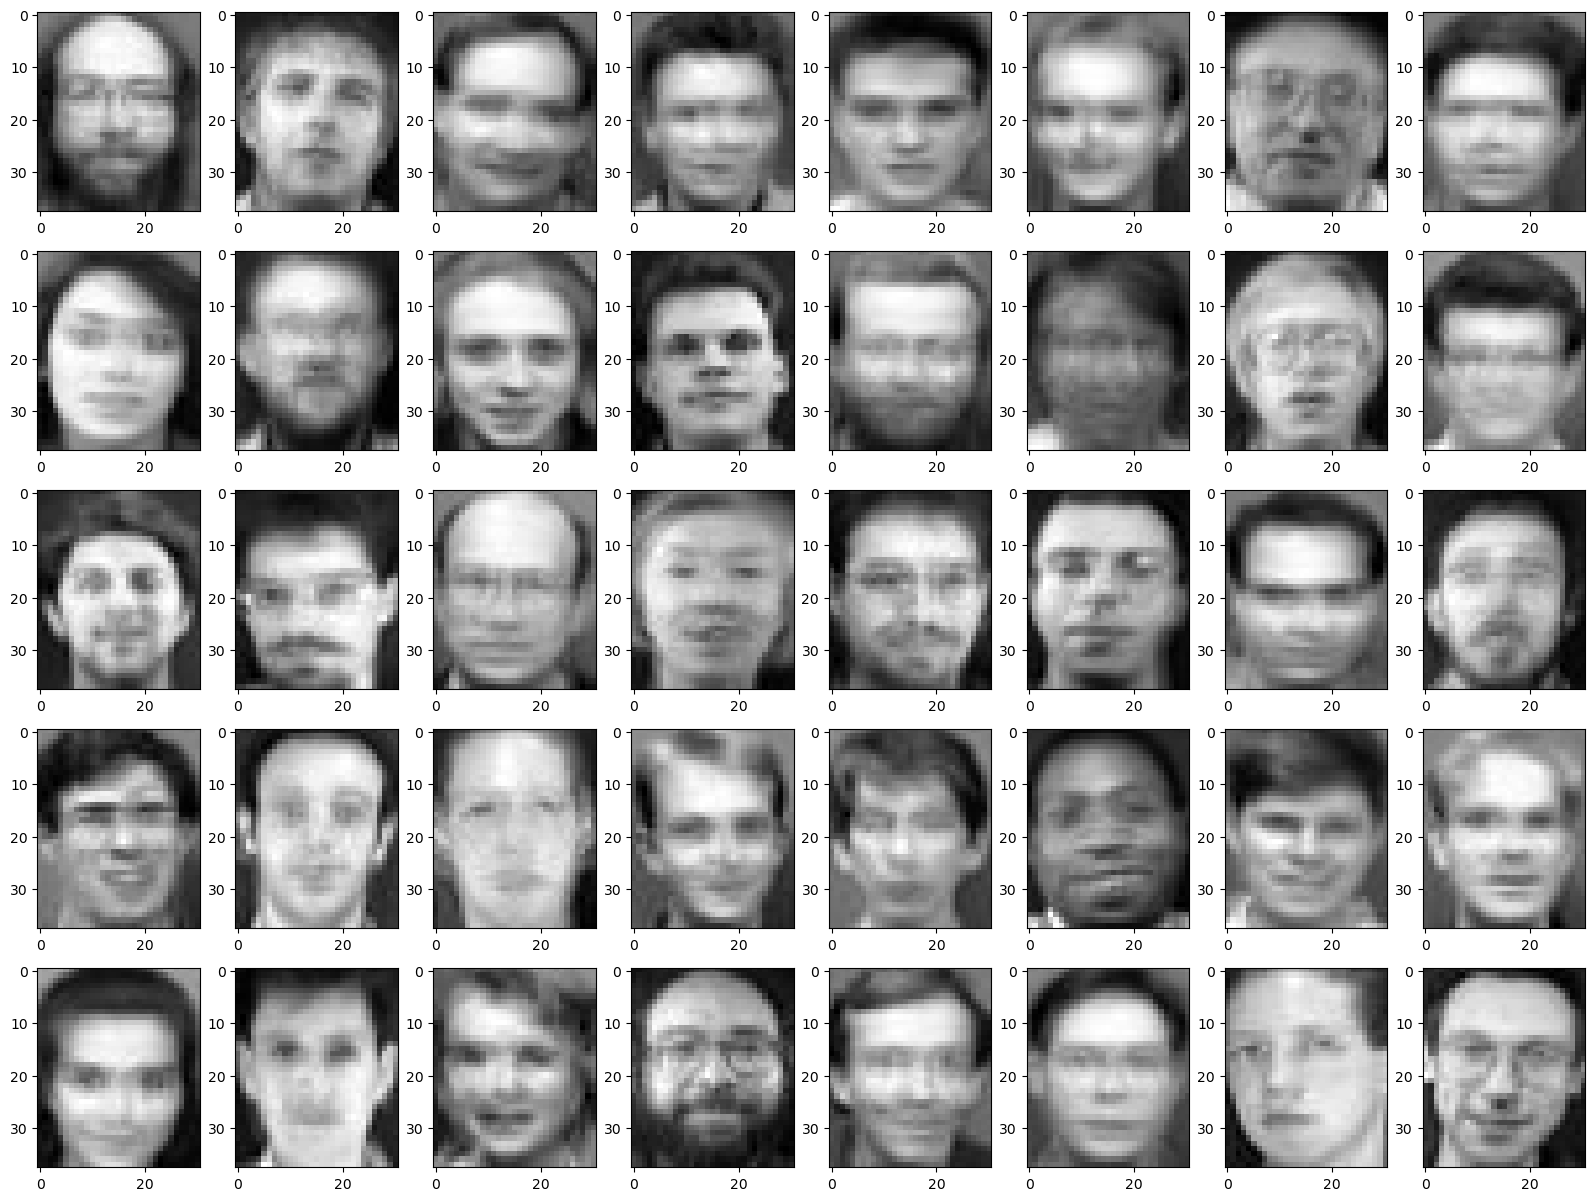

In [76]:
fig, ax = plt.subplots(5, 8, figsize = (20,15))
centers = cc.reshape(40, 38, 31)
for axi, center in zip(ax.flat, centers):
    axi.imshow(center, interpolation="nearest", cmap = "gray")

In [77]:
# Image(filename='s8.png')

### B. Score

As in [5.11 Example 1](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html#Example-1:-k-means-on-digits), the `KMeans()` algorithm will 
return cluster labels from 0-39 that are some permutation of the original labels (which it does not know -- **Note also:** the original labels in the y_train and y_test data are given as 1-40).

The cluster labels can be mapped to the original labels using the original label that occurs most frequently in each cluster (the 'mode' as in above-linked notebook). Using this assignment, what is the percentage of the training images labelled correctly?<br>
(You should get over 80%, which is quite high given that random guessing would give 1/40 = 2.5%.)

[Bonus] Since it runs quickly, you can search through random states -- see if you can find a random state with higher training score than for `random_state=832`.)

In [78]:
from scipy.stats import mode

In [79]:
labels = np.zeros(40)
labels2 = np.zeros_like(clusters)
for i in range(40):
    mask = (clusters == i)
    modex = mode(y_train[mask])[0]
    labels2[mask] = modex
    labels[i] = modex
print(labels)

[28. 15. 25. 21. 30.  5. 34. 38.  8. 14. 12. 36. 26. 39.  2.  6.  7. 17.
 13. 32. 17. 19.  9. 11. 20. 16.  1. 40. 29. 22. 33. 18. 10. 24. 15. 37.
  3.  4.  1. 27.]


In [80]:
from sklearn.metrics import accuracy_score
round(accuracy_score(y_train, labels2) * 100,2)

83.93

### C. Confusion matrix

Plot the confusion matrix for the training set results above. (For this you can use scikit-learn's `confusion_matrix()` and `ConfusionMatrixDisplay()`. Recall that the original labels run from 1-40, not 0-39).

Which are the two most conflated subjects (i.e., the largest off-diagonal element)?

Show the training set images for those two subjects in a 2 row x 7 column grid (using `figsize=(12,4)`).<br>
[It will look something like the below for subjects labelled 8 and 10, though these are not the two most confused subjects -- in fact these two are not confused at all by the kMeans classifier.]

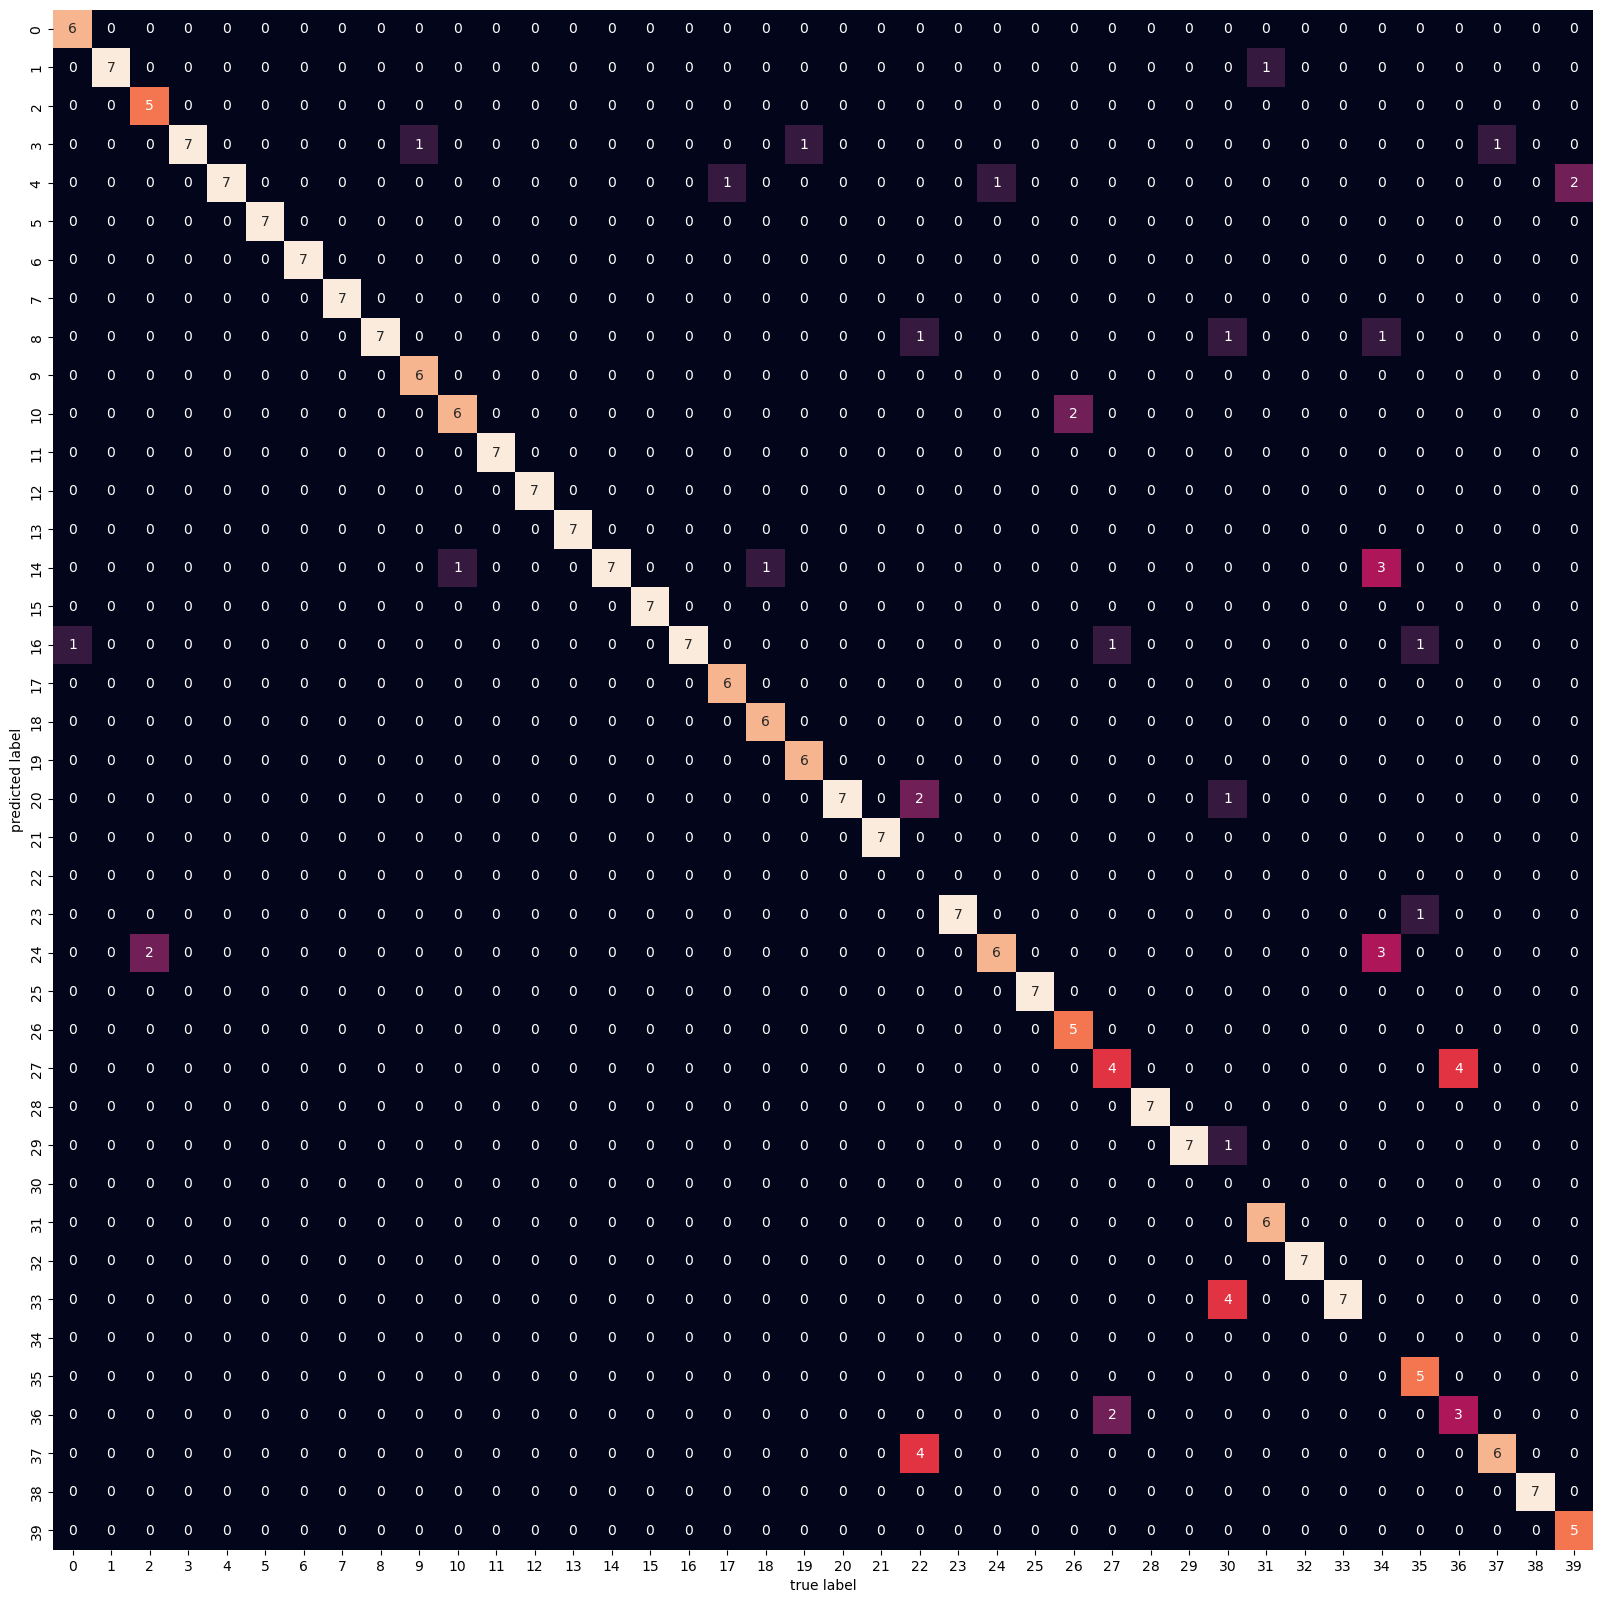

In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_train, labels2)
plt.figure(figsize = (20,20))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

The most conflated subjects are subjects number 23 with 38, 31 with 34, and 37 with 28, each pair of which were confounded four times.

In [82]:
indices_4_c = [(23,38),(31,34),(37,28)]

In [87]:
# for tuple in indices_4_c:
#     fig,axi = plt.subplots(1,6,figsize=(12, 4))
#     for i,ax in zip(tuple,axi):
#         ax.imshow(X_train[y_train == i].reshape(8,8),cmap='Greys', aspect=1, interpolation='none')

# fig,axi = plt.subplots(1,6,figsize=(12, 4))
# for i,ax in zip(indices_4_c,axi):
#     ax.imshow(X_train[y_train == i].reshape(8,8),cmap='Greys', aspect=1, interpolation='none')
    

In [89]:
# fig,axi = plt.subplots(2,7,figsize=(12, 4), sharex=True, sharey=True)
# for i,ax in zip(np.where(diffs)[0],axi.flatten()):
#     ax.imshow(X_train[y_train == i],cmap='Greys', aspect=1, interpolation='none')
#     ax.set_xticks([]), ax.set_yticks([])
#     ax.set_title(f'idx:{i}, pred:{y_pred[i]}, true:{y_test[i]}',fontsize=8,color='b')

In [ ]:
# Image(filename='s8_s10.png')

### D. test set

Now run your `.predict()` method on the 120 test images, and determine the overall percentage assigned to the correct clusters.<br>
(You should get over 70%)

In [84]:
predictions = labels[kmeans.predict(X_test)]

In [85]:
predictions

array([15.,  3., 14., 29.,  4., 18.,  5., 21., 13.,  5.,  2.,  6.,  4.,
       34., 33., 17., 34., 12., 24.,  5.,  6.,  5.,  1.,  5.,  4., 14.,
        9.,  1., 29.,  5.,  8., 33., 21.,  3., 39., 32., 39., 26.,  9.,
        7., 22., 15., 28.,  4., 10., 13., 19., 25., 37., 37., 37.,  4.,
       19.,  6., 14., 19.,  9., 16., 11., 26., 25.,  5., 32., 16., 24.,
        5., 30.,  8., 11., 16., 38., 15.,  2., 37., 36., 38., 18., 22.,
        9.,  7.,  9., 12., 32., 13., 11.,  3.,  1., 38.,  2., 10., 25.,
       12., 29., 27., 26., 39.,  7., 30., 34., 15., 11., 25., 10., 11.,
       21., 21., 30., 24., 17., 24.,  8., 22., 38., 34., 28., 30., 38.,
       21.,  9.,  9.])

In [86]:
np.sum(y_test == predictions)/len(y_test) * 100

77.5